In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Seaborn

Seaborn is a library that builds on top of matplotlib, and features nice integration with pandas, and the rest of the python data science ecosystem.

While in theory there is nothing you can do with seaborn that you can't do with matplotlib, seaborn provides a nice set of defaults that helps us produce better looking visualizations faster.

Convention is to import the seaborn module as `sns`.

Seaborn comes with some datasets built in, which we can use to explore the it's plotting capabilities. One of the most common ones is the mpg data set, which contains various information about a vehicles and their qualites.


In [2]:
mpg = sns.load_dataset('mpg')

mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Scatter Charts

To explore seaborn's plotting functionality, we'll start by making a scatter chart of the mpg data set. We'll plot total bill amount against the mpg amount.

We will use the `relplot` function which we'll need to supply several keyword arguments to:

- `data`: a pandas dataframe that contains the data we want to plot
- `x`: the name of the column that will be the x value
- `y`: the name of the column that will be the y value

`sns.relplot(x='horsepower', y='mpg', data=mpg)`

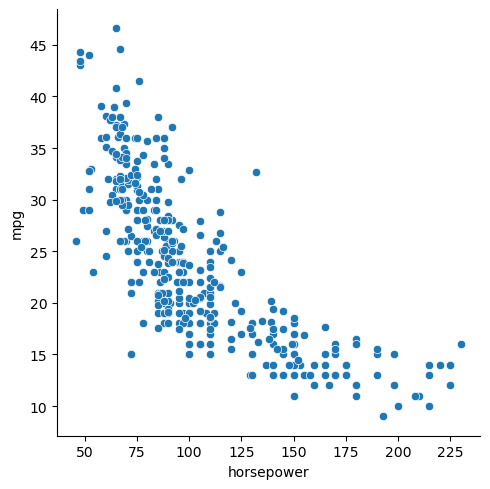

In [4]:
sns.relplot(x='horsepower',y='mpg',data=mpg)

Once the figure has been produced by seaborn, we can treat it as any other matplotlib figure, i.e. we can set a title or change the axis labels the same way we have in the past. We also would create subplots the same way.

Text(13.819444444444445, 0.5, 'Miles Per Gallon')

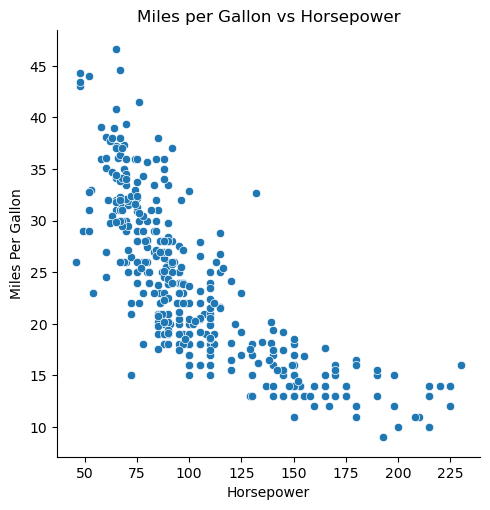

In [5]:
sns.relplot(x='horsepower', y='mpg', data=mpg)
plt.title('Miles per Gallon vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')

One of the most useful features of seaborn is the ability to easily break down quantitative data by a qualitative measure. For example, to create two separate charts that represent the two different times of day in our data set, we can simply use the `col` keyword argument, and specify the name of the column:

In [6]:
# let's create a model decade column to make a cleaner aggregate.
# here I take the string version of the model_year and truncate the last digit
# I then add in "0's" for legibility.
mpg['model_decade'] = mpg.model_year.apply(lambda x: str(x)[0] + '0\'s')

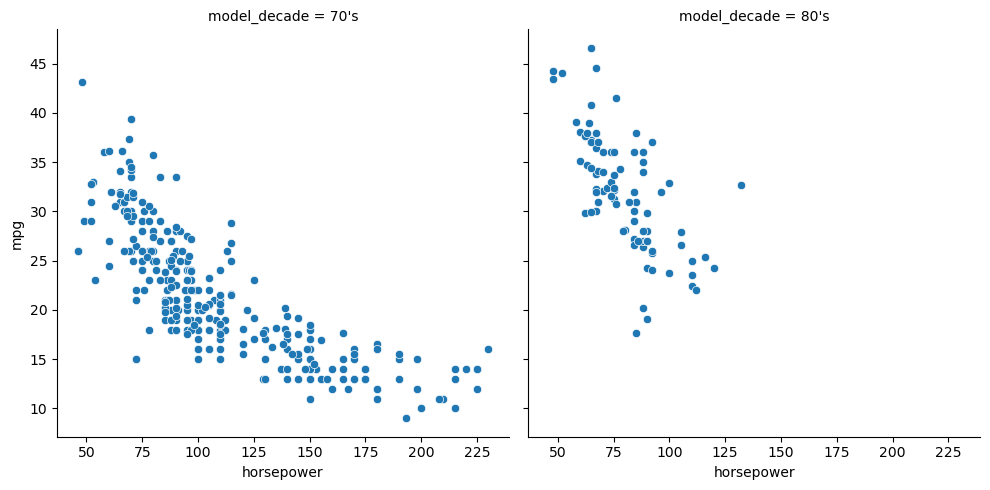

In [7]:
sns.relplot(x='horsepower', y='mpg', col='model_decade', data=mpg)

Like the `col` keyword argument, we can use the `hue` keyword argument to separate the data points by color:

In [8]:
# seaborn interacts with something that is discrete but still numerical a bit different
# than what we may anticipate.  I want to view cylinders 
# expressly as a category agnostic of numerical value here, 
# so i'll add in a word after casting the value as a string.
mpg['cyl_cat'] = mpg.cylinders.astype(str) + ' cylinders'

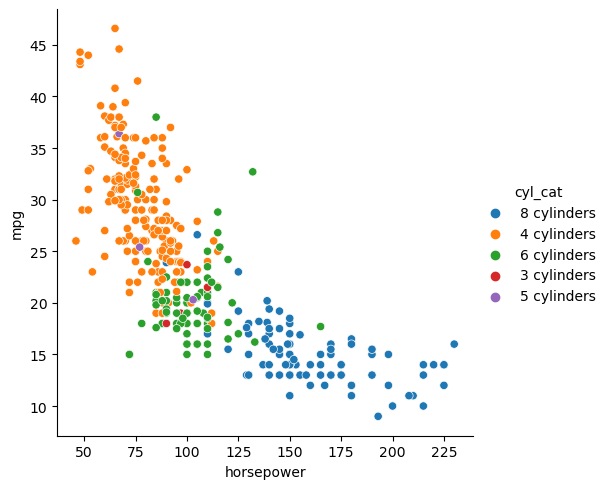

In [9]:
sns.relplot(x='horsepower', y='mpg', hue='cyl_cat', data=mpg)

We can also change the shape of the data points with the `style` keyword argument:

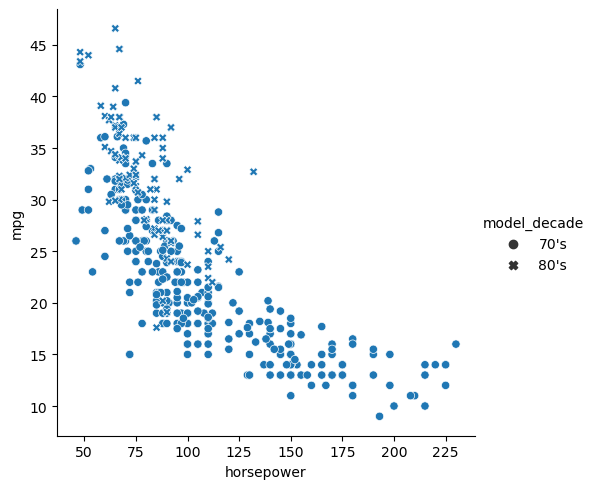

In [10]:
sns.relplot(x='horsepower', y='mpg', style='model_decade', data=mpg)

All of these options can be combined as well:

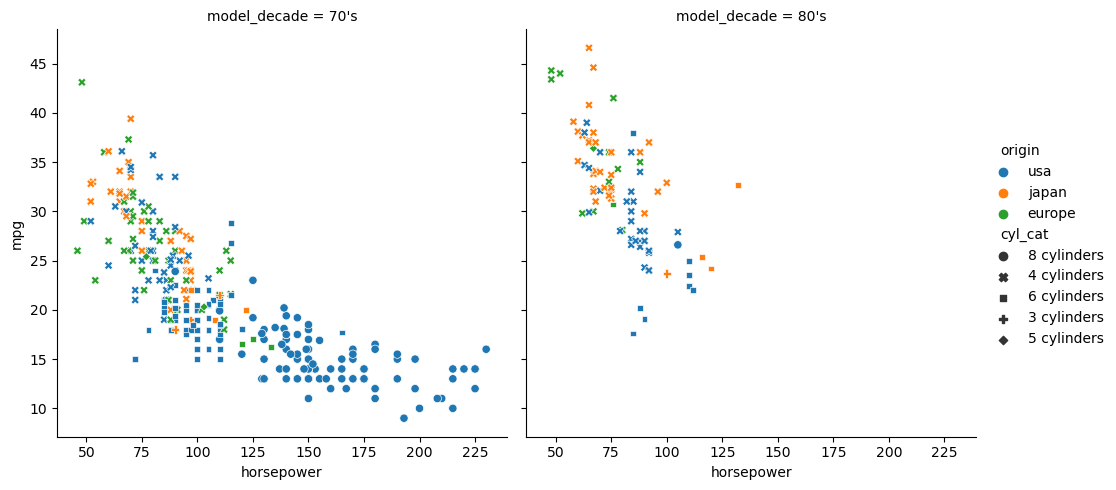

In [11]:
sns.relplot(x='horsepower', y='mpg', col='model_decade', hue='origin', style='cyl_cat', data=mpg)

But, (as you can see from the chart above), adding all of these options is not always a good choice and can lead to a chart that is too busy.

## Other Chart Types

`histplot` is a function that can be used to check the distribution of a dataset.

The `kde=True` argument approximates the distribution for continuous values.

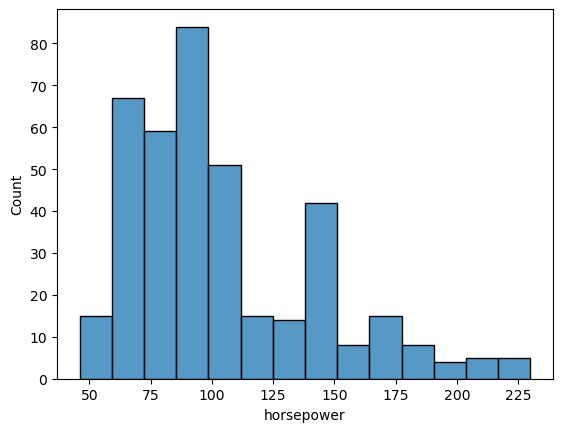

In [12]:
sns.histplot(mpg.horsepower)
plt.show()

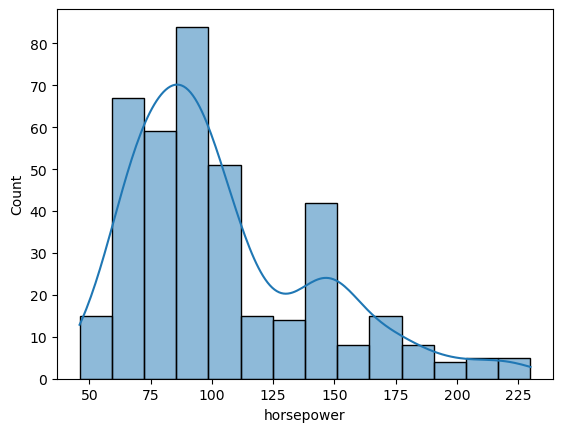

In [13]:
sns.histplot(mpg.horsepower, kde=True)
plt.show()

The `boxplot` function has all the same conveniences we've come to expect of seaborn:

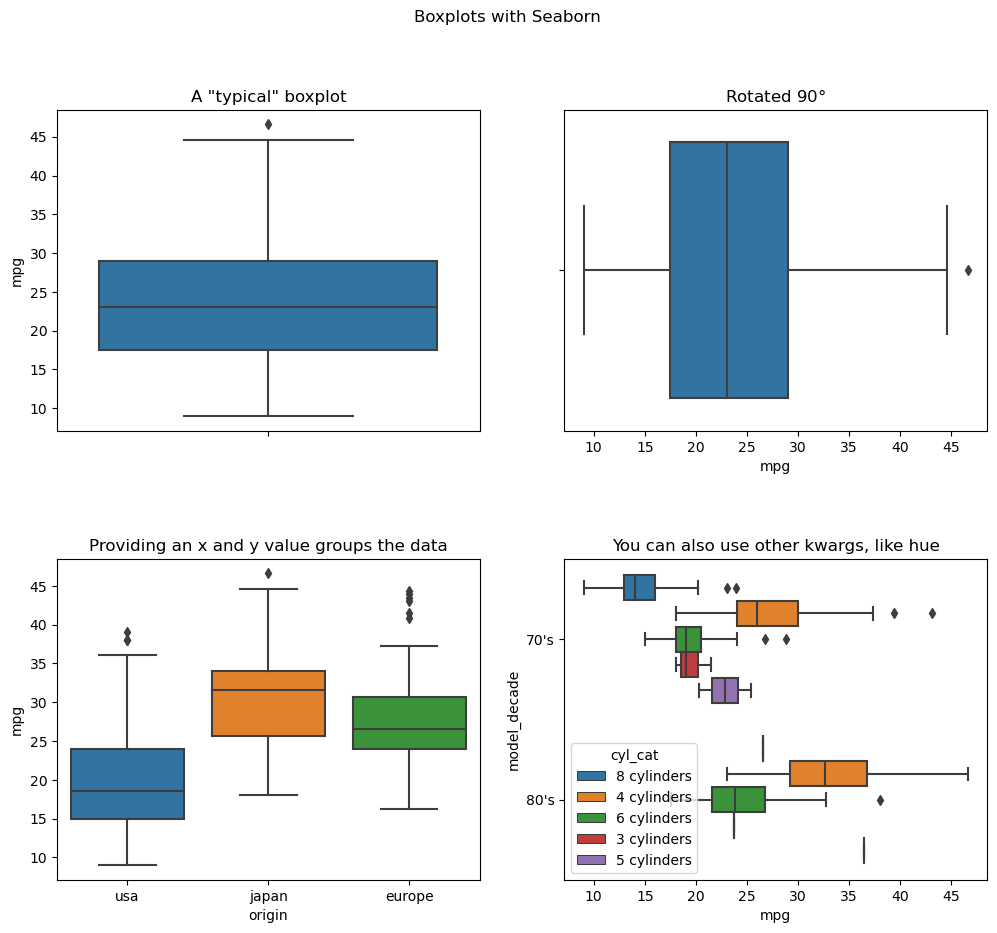

In [14]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=mpg, y='mpg')
plt.title('A "typical" boxplot')

plt.subplot(222)
sns.boxplot(data=mpg, x='mpg')
plt.title('Rotated 90$\degree$')

plt.subplot(223)
sns.boxplot(data=mpg, y='mpg', x='origin')
plt.title('Providing an x and y value groups the data')

plt.subplot(224)
sns.boxplot(data=mpg, y='model_decade', x='mpg', hue='cyl_cat')
plt.title('You can also use other kwargs, like hue')

plt.subplots_adjust(hspace=0.4)

The `heatmap` function can be used to visualize tabular data:

origin,europe,japan,usa
model_decade,,,
70's,55,45,209
80's,15,34,40


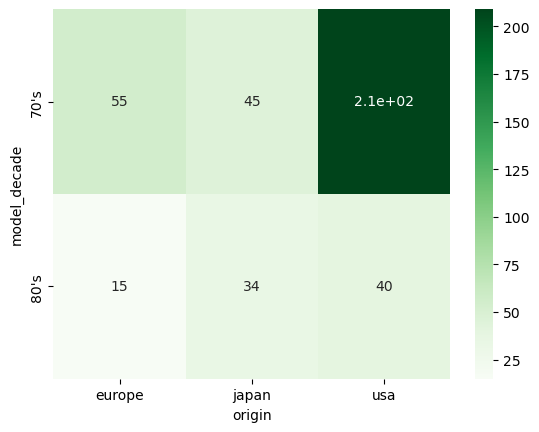

In [15]:
data = pd.crosstab(mpg.model_decade, mpg['origin'])
sns.heatmap(data, annot=True, cmap=plt.cm.Greens)
data

Text(0.5, 1.0, 'mpg')

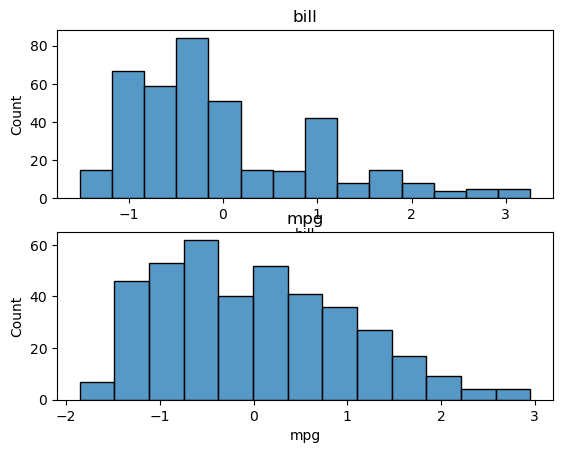

In [16]:
def scale(series):
    return (series - series.mean()) / series.std()

df = pd.DataFrame({'bill': scale(mpg.horsepower),
                   'mpg': scale(mpg.mpg)})

plt.subplot(211)
sns.histplot(df.bill)
plt.title('bill')

plt.subplot(212)
sns.histplot(df.mpg)
plt.title('mpg')

To get a very broad view of an entire data set, the `pairplot` function can be used. It will visualize the relationship between every quantitative feature in a dataset.

`sns.pairplot(mpg)`

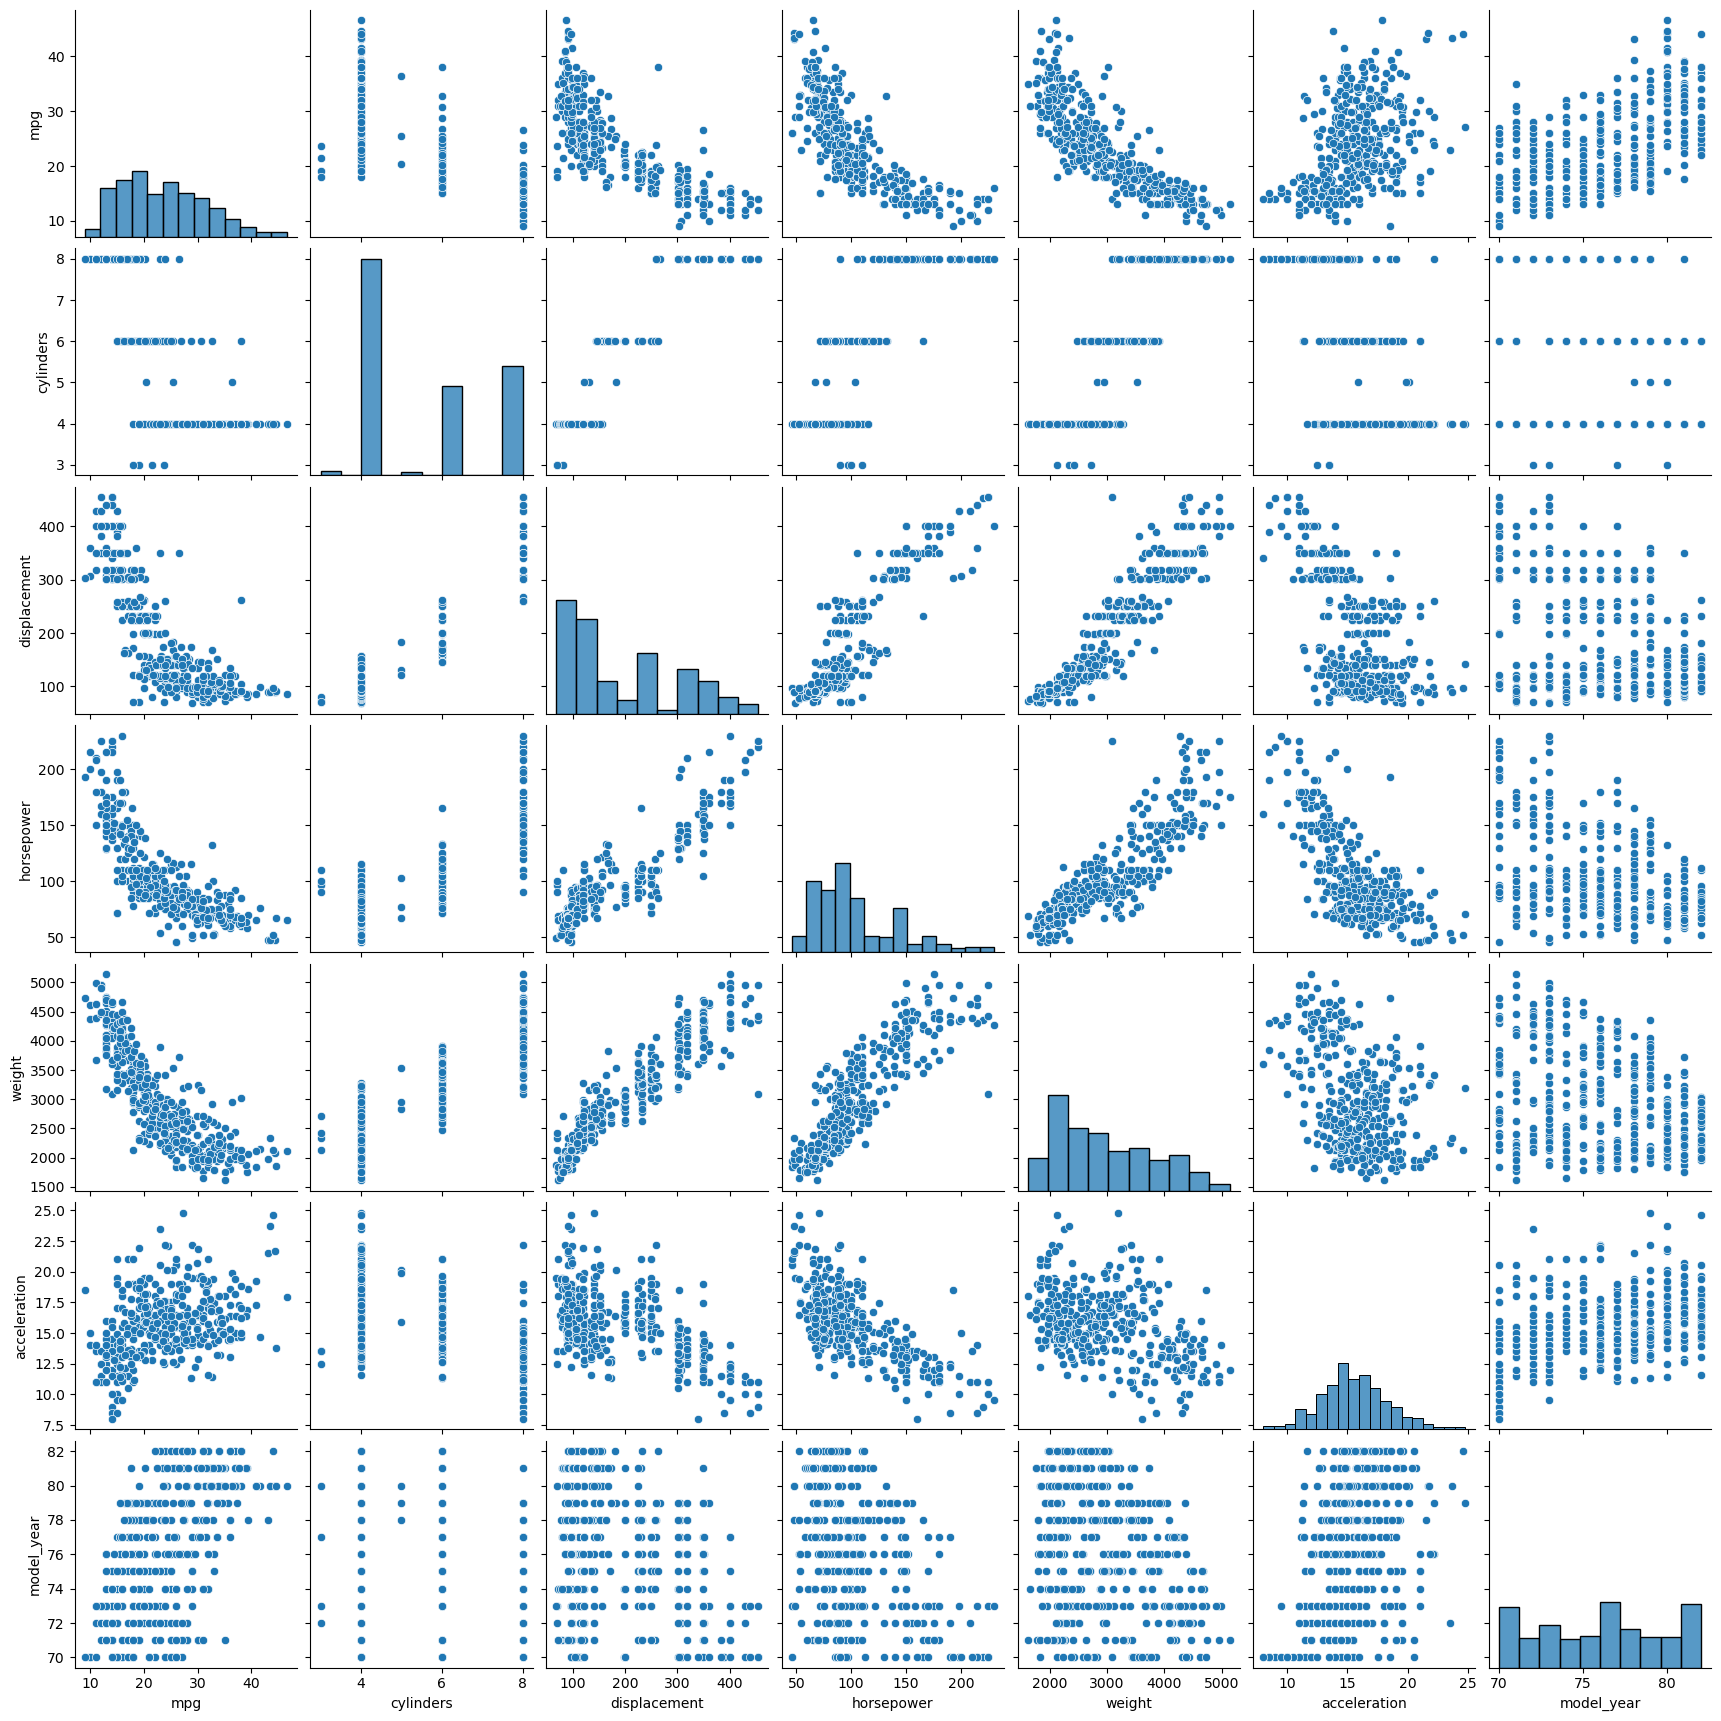

In [17]:
sns.pairplot(mpg)

We can use `jointplot` to combine two visualizations:

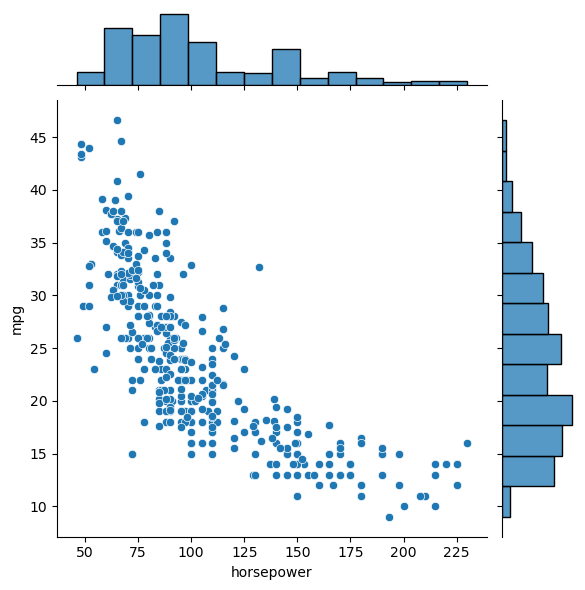

In [18]:
sns.jointplot(data=mpg, x='horsepower', y='mpg')